Imports

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Inicialización

In [ ]:
matrix_dimension = 512
blur_dimension = 3

B = np.array([
    [0,-1,0],
    [-1,4,-1],
    [0,-1,0]
])

C = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,1]
])

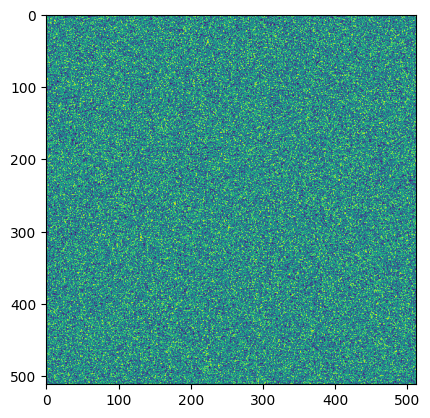

In [11]:
imagen = torch.rand((matrix_dimension,matrix_dimension), dtype=torch.float)
plt.imshow(imagen)

Funciones

In [ ]:
def mult_matriz(A, B):
    result = 0
    for i in range(A.shape[0]):
        for j in range(B.shape[1]):
            result += A[i][j] * B[i][j]
    return result

In [ ]:
def blur(imagen,matrix_dimension,blur_dimension):

  ##Inicialización

  borde = int(blur_dimension/2)
  dim_imagen_blur = matrix_dimension-blur_dimension+1
  imagen_blur = torch.randn((dim_imagen_blur,dim_imagen_blur))

  ## Encontramos blur

  for i in range(dim_imagen_blur):
    for j in range(dim_imagen_blur):
      imagen_blur[i,j] = imagen[i:i+blur_dimension,j:j+blur_dimension].mean()

  return imagen_blur

In [ ]:
def filtro(imagen,matrix_dimension,blur_dimension):

  ##Inicialización

  borde = int(blur_dimension/2)
  dim_imagen_blur = matrix_dimension-blur_dimension+1
  imagen_blur = torch.randn((dim_imagen_blur,dim_imagen_blur))

  ## Encontramos blur

  for i in range(dim_imagen_blur):
    for j in range(dim_imagen_blur):
      imagen_blur[i,j] = mult_matriz(imagen[i:i+blur_dimension,j:j+blur_dimension],B)

  return imagen_blur

In [ ]:
def blur_contorno(imagen,blur,blur_dimension):

  imagen_final = np.copy(imagen)
  borde = int(blur_dimension/2)
  dim_imagen_blur = blur.size()[0]

  for i in range(dim_imagen_blur):
    for j in range(dim_imagen_blur):
      imagen_final[i+borde][j+borde] = blur[i][j]

  return imagen_final

Ejecución

In [ ]:
imagen_filtro = filtro(imagen[:],matrix_dimension,blur_dimension)
imagen_final_filtro = blur_contorno(imagen,imagen_filtro,blur_dimension)

In [ ]:
imagen_blur = blur(imagen[:],matrix_dimension,blur_dimension)
imagen_final_blur = blur_contorno(imagen,imagen_blur,blur_dimension)

Visualización

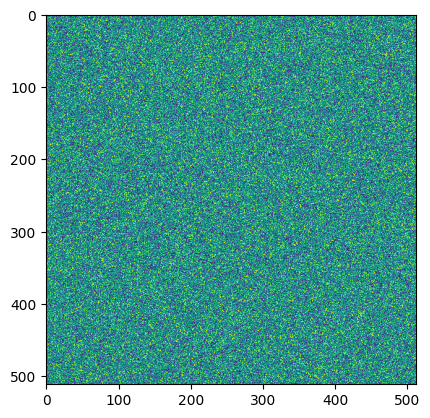

In [ ]:
plt.imshow(imagen)

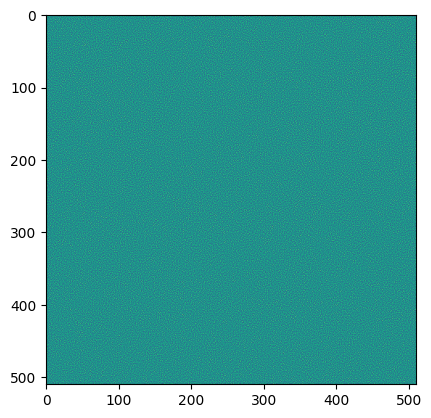

In [ ]:
plt.imshow(imagen_filtro)

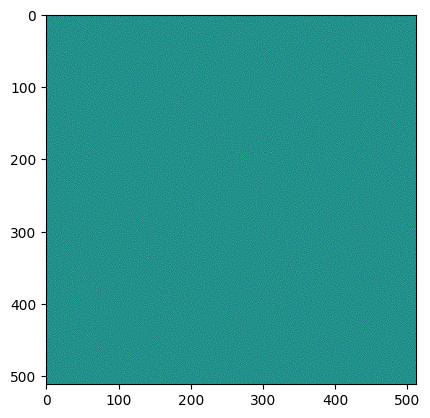

In [ ]:
plt.imshow(imagen_final_filtro)

In [ ]:
print(imagen_final_filtro[0,0])
print(imagen[0,0])
print(imagen_final_filtro[1,1])
print(imagen[1,1])

0.64826125
tensor(0.6483)
0.20898247
tensor(0.6826)
